# CREDIT RISK MODELING USING LOGISTIC REGRESSION

Credit risk analysis focuses on predicting the likelihood of a borrower defaulting on their loan and assessing its financial impact on the lender if default occurs. Logistic regression is leveraged in this analysis to address those objectives. The dataset, obtained from [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset), contains 32.581 observations and 12 variables.

#### Data description:
| Feature Name | Description  |
|---|---|
| person_age | Age |
| person_income | Annual income (in US\$1000) |
| person_home_ownership | Type of home ownership |
| person_emp_length | How long have borrowers been working (in years)? |
| loan_intent | The uses of loan |
| loan_grade | Loan grade of borrower: A (lowest risk)—F (highest risk) |
| loan_amnt | Amount of money applied (in US$100) |
| loan_int_rate | Interest rate |
| **loan_status** | outcome variable, 0: non-default; 1: default |
| loan_percent_income | Percentage of an individual's income to pay the loan |
| cb_person_default_on_file | Historical default |
| cb_person_cred_hist_length | Credit history length |

#### Statistical Model of Logistic Regression
In linear regression the best fit model is: $y = β_0 + β_1x$ 

But since, `loan_status` as an outcome, coded as 1 if the borrower defaults on their loan and 0 if they have paid the loan. It is more appropriate for modeling probabilities, instead of linear relationship within its given predictor(s). The problem is, if we use linear model, it will cause the predicted probabilites more than 1 and less than 0. So, to constraint the output to the range between 0 and 1, we first transform the probability into odds,\
$$ \frac{P = β_0 + β_1x}{\frac{P}{1-P} = β_0 + β_1x}$$

The logistic function is the **sigmoid function** used to map the output of a linear regression model to a value between 0 and 1.\
Logistic function: $$P = \frac{1}{1 + e^{-x}} = \frac{exp^{x}}{1 + exp^{x}}$$

With this credit risk analysis, we have `loan_status` as an outcome, we can use $p(x)$ as the predicted probability of outcome for the given any predictors $X_1,...,X_n$ equals to 1 and $1 - p(x)$ when the outcome equals to 0. Suppose a model of 


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, \
precision_recall_fscore_support

import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

In [2]:
# Load and print the first 5 data
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.shape

(32581, 12)

In [5]:
# Checking null values
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# Checking for possible duplicated value(s)
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
# Drop duplicates 
df.drop_duplicates(inplace=True)

In [8]:
#Detecting outlier using statistical tests
def outlier(df):
    result_df = pd.DataFrame(columns=['Count','Mean','Std','Min','25%', '50%','75%', '95%','Max','IQR', 'Lower Thresh', 'Upper Thresh'])
    
    for col in df.select_dtypes(include=np.number).columns: 
        count = df[col].count()
        mean = np.mean(df[col])
        std = np.std(df[col])
        min = np.min(df[col])
        q1 = df[col].quantile(.25)
        p50 = df[col].quantile(.5)
        q3 = df[col].quantile(.75)
        p95 = df[col].quantile(.95)
        max = np.max(df[col])
        iqr = q3 - q1
        lower_thresh = q1 - 1.5 * iqr
        upper_thresh = q3 + 1.5 * iqr
        
        result_df.loc[col] = [count, mean, std, min, q1, p50,q3, p95, max, iqr, lower_thresh, upper_thresh]
    
    return round(result_df,1)

outlier(df)

,Count,Mean,Std,Min,25%,50%,75%,95%,Max,IQR,Lower Thresh,Upper Thresh
person_age,32416.0,27.7,6.4,20.0,23.0,26.0,30.0,40.0,144.0,7.0,12.5,40.5
person_income,32416.0,66091.6,62014.6,4000.0,38542.0,55000.0,79218.0,138000.0,6000000.0,40676.0,-22472.0,140232.0
person_emp_length,31529.0,4.8,4.1,0.0,2.0,4.0,7.0,13.0,123.0,5.0,-5.5,14.5
loan_amnt,32416.0,9593.8,6322.6,500.0,5000.0,8000.0,12250.0,24000.0,35000.0,7250.0,-5875.0,23125.0
loan_int_rate,29321.0,11.0,3.2,5.4,7.9,11.0,13.5,16.3,23.2,5.6,-0.5,21.8
loan_status,32416.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
loan_percent_income,32416.0,0.2,0.1,0.0,0.1,0.2,0.2,0.4,0.8,0.1,-0.1,0.4
cb_person_cred_hist_length,32416.0,5.8,4.1,2.0,3.0,4.0,8.0,14.0,30.0,5.0,-4.5,15.5


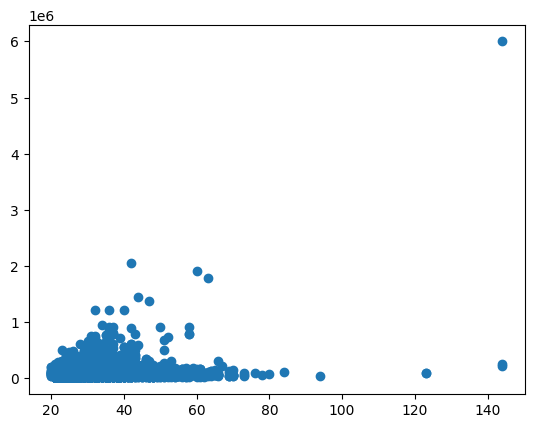

In [9]:
# Detecting outliers using scatter plot
plt.scatter(x=df.person_age,y= df.person_income)
plt.show()

**Outliers:** 
- On **person_age**, there are a bit of observations seem too far from the others (>100 years old)
- On **person_income**, there is a single observation with a very high income ($6.000.000)
- For **person_emp_length**, according to [Forbes](https://www.forbes.com/sites/teresaghilarducci/2021/05/28/how-many-years-do-you-have-to-work-before-you-retire/) an average years of work in US is 42 years

## Dataset (w/o Outliers)

In [10]:
# Create new df w/o outliers
df2 = df[(df['person_age'] <100) & (df['person_income']<6000000)&(df['person_emp_length']<=42)]
df2.shape

(31522, 12)

In [11]:
# change the unit of change of person_income and loan_amnt as a $1000 & a $100
df2['person_income'] = df2['person_income']/1000
df2['loan_amnt'] = df2['loan_amnt']/100

## Handling Missing Values

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31522 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31522 non-null  int64  
 1   person_income               31522 non-null  float64
 2   person_home_ownership       31522 non-null  object 
 3   person_emp_length           31522 non-null  float64
 4   loan_intent                 31522 non-null  object 
 5   loan_grade                  31522 non-null  object 
 6   loan_amnt                   31522 non-null  float64
 7   loan_int_rate               28495 non-null  float64
 8   loan_status                 31522 non-null  int64  
 9   loan_percent_income         31522 non-null  float64
 10  cb_person_default_on_file   31522 non-null  object 
 11  cb_person_cred_hist_length  31522 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 3.1+ MB


In [13]:
# Filling missing values with mean
df2['loan_int_rate'] = df2['loan_int_rate'].fillna(np.mean(df['loan_int_rate']))

## Exploratory Data Analysis

In [14]:
df2['loan_status'].value_counts(normalize=True)*100

0    78.405558
1    21.594442
Name: loan_status, dtype: float64

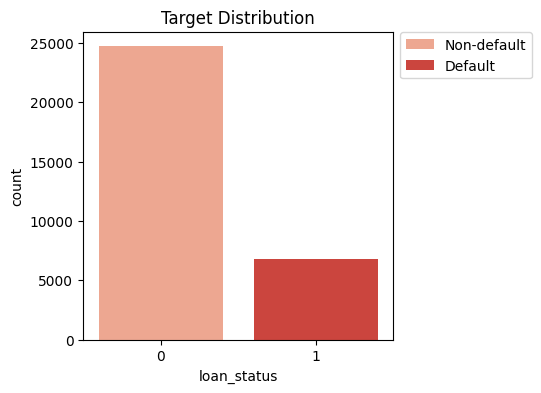

In [15]:
# Visualizing target variable
plt.figure(figsize=(4, 4))
sns.countplot(data=df2, x='loan_status', palette='Reds')
plt.title('Target Distribution')
plt.legend(labels=['Non-default','Default'], bbox_to_anchor=(1.47, 1.02))
plt.show()

The graph represents the number of people who have defaulted and those who haven't. With **approx. 22% default rate**, we can say that there is no imbalance issue.

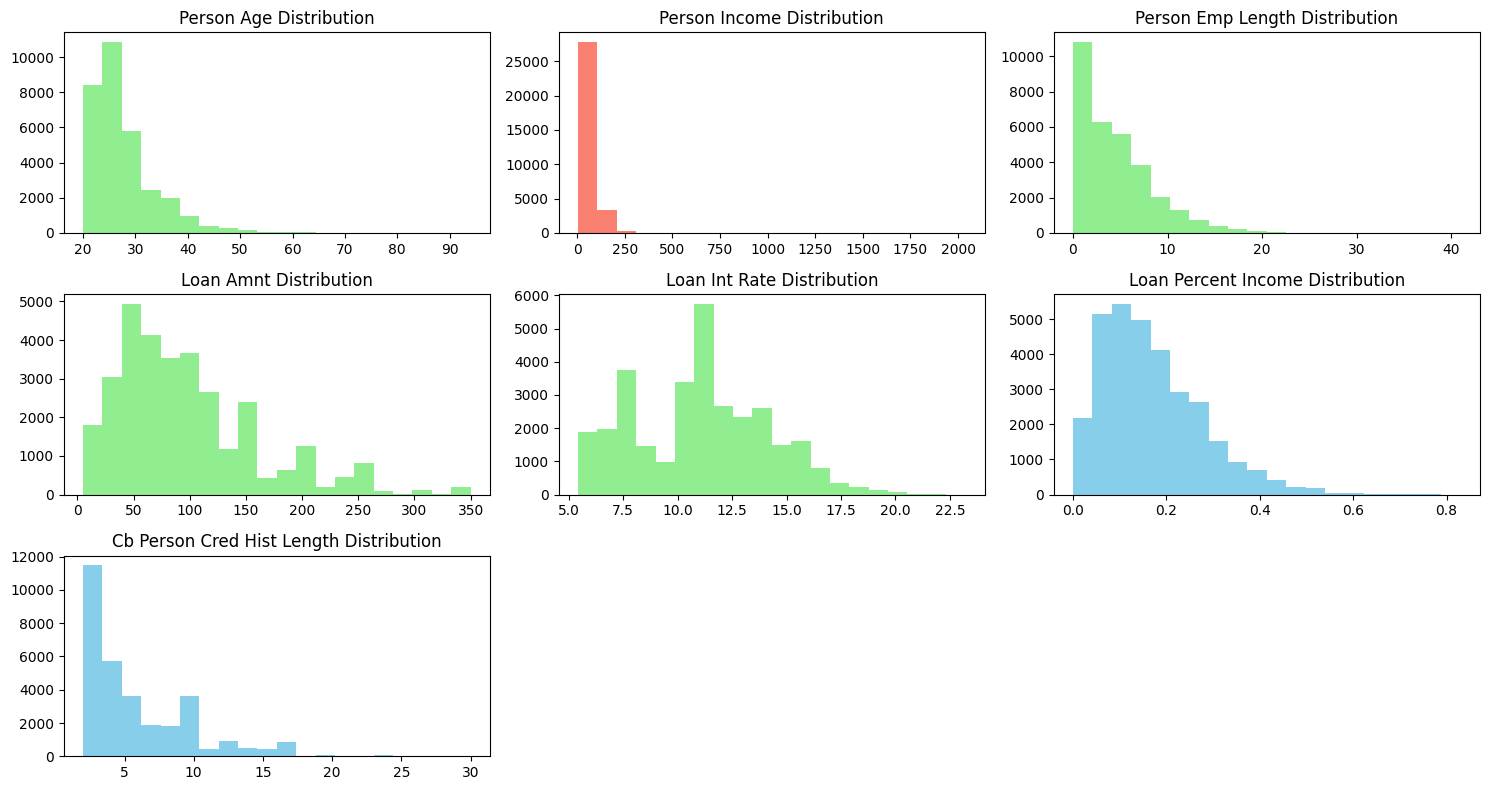

In [16]:
import random

num_var = df2.select_dtypes(include=np.number).columns.tolist()
del num_var[5] # for excluding target variable

plt.figure(figsize=(15, 8))
colors = ['skyblue', 'salmon', 'lightgreen']

for i, var in enumerate(num_var, start=1):
    plt.subplot(3, 3, i)  # row, column, position
    rand_colors = random.choice(colors)
    plt.hist(df2[var], bins=20, color=rand_colors)
    plt.title(f'{var.replace("_", " ").title()} Distribution')

plt.tight_layout()
plt.show()

With these histogram we can see the dispersion on each continous variable. It's fine to go, since logistic regression doesn't require a normal distribution

## One-hot Encoding

In [17]:
df2 = pd.get_dummies(df2)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31522 entries, 1 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      31522 non-null  int64  
 1   person_income                   31522 non-null  float64
 2   person_emp_length               31522 non-null  float64
 3   loan_amnt                       31522 non-null  float64
 4   loan_int_rate                   31522 non-null  float64
 5   loan_status                     31522 non-null  int64  
 6   loan_percent_income             31522 non-null  float64
 7   cb_person_cred_hist_length      31522 non-null  int64  
 8   person_home_ownership_MORTGAGE  31522 non-null  uint8  
 9   person_home_ownership_OTHER     31522 non-null  uint8  
 10  person_home_ownership_OWN       31522 non-null  uint8  
 11  person_home_ownership_RENT      31522 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

In [19]:
# Drop some variables to set as a reference
df2.drop(columns=['person_home_ownership_OTHER','loan_intent_PERSONAL','loan_grade_A','cb_person_default_on_file_N'], axis=1, inplace=True)

## Multicollinearity Test

Another assumption in logistic regression is **no high multicollinearity (VIF < 10 or Corr. coef. < 0.8)**, it means no independent variable should be related to one or more other independent variables.

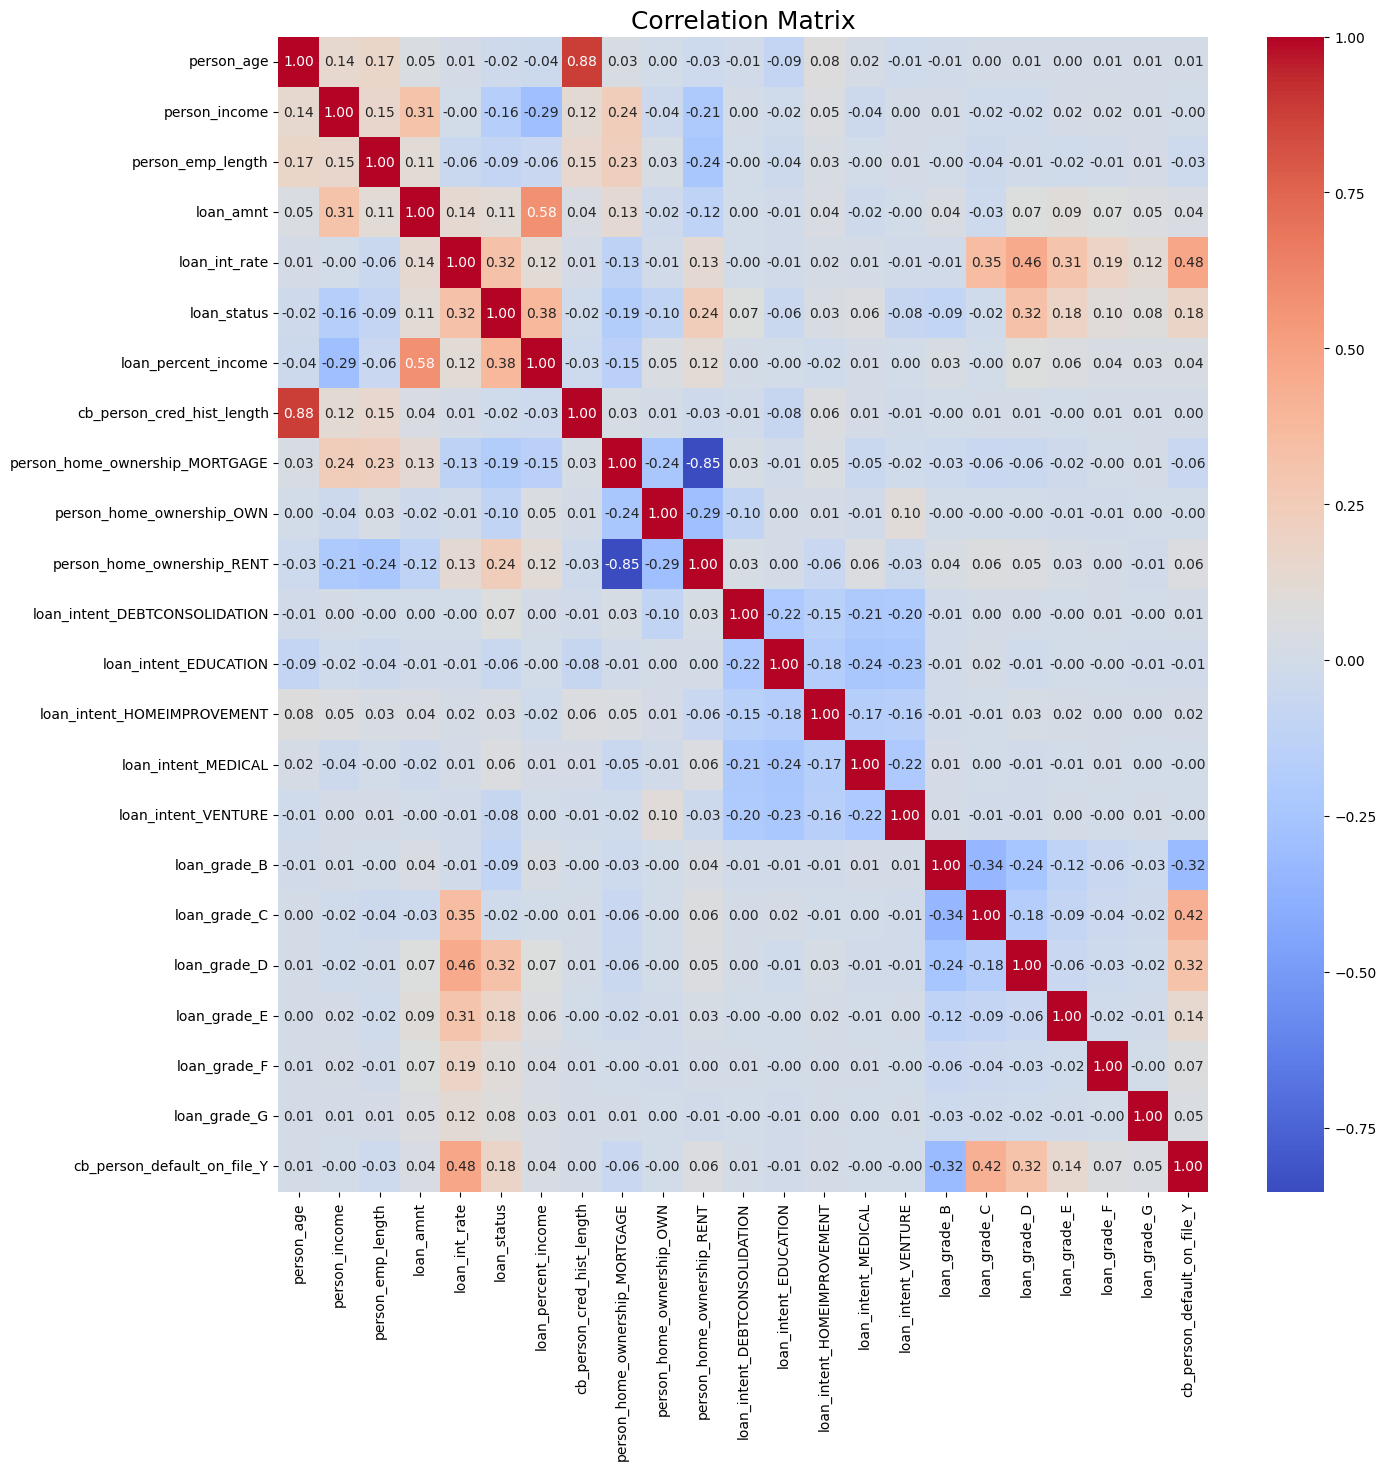

In [20]:
# Visualize the correlation of each variable
corr = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [21]:
# Detect multicol using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# the independent variables set 
X = df2.drop(columns=['loan_status']) 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))] 

print(vif_data.sort_values(by='VIF', ascending=False))

                           feature        VIF
0                       person_age  82.548494
4                    loan_int_rate  70.342622
9       person_home_ownership_RENT  37.974781
7   person_home_ownership_MORTGAGE  30.814946
6       cb_person_cred_hist_length  12.418560
5              loan_percent_income   8.776274
3                        loan_amnt   8.584358
8        person_home_ownership_OWN   6.567925
16                    loan_grade_C   5.535361
17                    loan_grade_D   4.965552
1                    person_income   4.636077
15                    loan_grade_B   3.963971
2                person_emp_length   2.672366
18                    loan_grade_E   2.455210
11           loan_intent_EDUCATION   2.159174
13             loan_intent_MEDICAL   2.088335
21     cb_person_default_on_file_Y   2.025445
14             loan_intent_VENTURE   2.022276
10   loan_intent_DEBTCONSOLIDATION   1.939566
12     loan_intent_HOMEIMPROVEMENT   1.655840
19                    loan_grade_F

- We can drop variables with high vif score, then recalculating the VIFs

In [22]:
# recalculating the VIF score
X = df2.drop(columns=['loan_status','person_age','loan_int_rate']) 

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature 
vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))] 

print(vif_data.sort_values(by='VIF', ascending=False))

                           feature       VIF
3              loan_percent_income  8.769483
2                        loan_amnt  8.580817
7       person_home_ownership_RENT  8.432770
5   person_home_ownership_MORTGAGE  7.185557
0                    person_income  4.611490
4       cb_person_cred_hist_length  3.170129
1                person_emp_length  2.652515
14                    loan_grade_C  2.214686
6        person_home_ownership_OWN  2.177549
9            loan_intent_EDUCATION  2.157701
11             loan_intent_MEDICAL  2.083108
19     cb_person_default_on_file_Y  2.025237
13                    loan_grade_B  2.020346
12             loan_intent_VENTURE  2.019338
8    loan_intent_DEBTCONSOLIDATION  1.937023
15                    loan_grade_D  1.725901
10     loan_intent_HOMEIMPROVEMENT  1.650104
16                    loan_grade_E  1.194326
17                    loan_grade_F  1.050793
18                    loan_grade_G  1.017895


## Build Logistic Regression Model

There are 2 ways to build a logistic regression model: (1) We can use `statsmodels` if we want to focus on a more interpretable model; (2) Or, we can use `sklearn` if our main goal is more towards using the model for predictions.

#### Data Splitting

In [23]:
df_smf = df2.copy()
train_data, test_data = train_test_split(df_smf, test_size=0.2, random_state=42)

#### Model Fitting

In [24]:
# fitting logistic regression model using statsmodels
from statsmodels.formula import api as smf

# fitting the model to the train data
model_sm = smf.logit("loan_status ~ person_income + cb_person_cred_hist_length + person_emp_length + loan_amnt + \
loan_percent_income + person_home_ownership_OWN + person_home_ownership_RENT + person_home_ownership_MORTGAGE +\
loan_intent_DEBTCONSOLIDATION + loan_intent_EDUCATION + loan_intent_HOMEIMPROVEMENT + loan_intent_MEDICAL + \
loan_intent_VENTURE + loan_grade_B + loan_grade_C +  loan_grade_D + loan_grade_E + loan_grade_F + loan_grade_G + \
cb_person_default_on_file_Y", data=train_data).fit()
print(model_sm.summary2())

Optimization terminated successfully.
         Current function value: 0.334504
         Iterations 8
                                Results: Logit
Model:                    Logit                Method:               MLE       
Dependent Variable:       loan_status          Pseudo R-squared:     0.360     
Date:                     2024-01-13 15:18     AIC:                  16912.3632
No. Observations:         25217                BIC:                  17083.2040
Df Model:                 20                   Log-Likelihood:       -8435.2   
Df Residuals:             25196                LL-Null:              -13189.   
Converged:                1.0000               LLR p-value:          0.0000    
No. Iterations:           8.0000               Scale:                1.0000    
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [25]:
# fitting the model to the train data
model_sm = smf.logit("loan_status ~ person_income + person_emp_length + loan_amnt + loan_percent_income + \
person_home_ownership_OWN + loan_intent_DEBTCONSOLIDATION + loan_intent_EDUCATION + loan_intent_HOMEIMPROVEMENT + \
loan_intent_MEDICAL + loan_intent_VENTURE + loan_grade_B + loan_grade_C + loan_grade_D + loan_grade_E + loan_grade_F + \
loan_grade_G", data=train_data).fit()
print(model_sm.summary2())

Optimization terminated successfully.
         Current function value: 0.341406
         Iterations 8
                                Results: Logit
Model:                   Logit                Method:               MLE       
Dependent Variable:      loan_status          Pseudo R-squared:     0.347     
Date:                    2024-01-13 15:18     AIC:                  17252.4773
No. Observations:        25217                BIC:                  17390.7769
Df Model:                16                   Log-Likelihood:       -8609.2   
Df Residuals:            25200                LL-Null:              -13189.   
Converged:               1.0000               LLR p-value:          0.0000    
No. Iterations:          8.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

### Interpretation Result

In [26]:
# converting the coefficients into odds ratio
coeff_interpret = pd.DataFrame(np.exp(model_sm.params), columns= ['OR'])
coeff_interpret['log_odds(beta_coeff)']=model_sm.params
coeff_interpret = coeff_interpret.loc[:,['log_odds(beta_coeff)','OR']]
coeff_interpret

,log_odds(beta_coeff),OR
Intercept,-3.867489,2.091081e-02
person_income,0.001254,1.001255e+00
person_emp_length,-0.033687,9.668737e-01
loan_amnt,-0.011903,9.881676e-01
loan_percent_income,14.190043,1.454312e+06
person_home_ownership_OWN,-2.333830,9.692380e-02
loan_intent_DEBTCONSOLIDATION,0.634527,1.886130e+00
loan_intent_EDUCATION,-0.216461,8.053641e-01
loan_intent_HOMEIMPROVEMENT,0.589923,1.803850e+00
loan_intent_MEDICAL,0.515015,1.673663e+00


We can convert the beta coefficient (log odds) into the odds ratio (OR), for a better interpretation. 

In [27]:
df_smf.drop(columns=['person_age','loan_int_rate','cb_person_cred_hist_length','person_home_ownership_MORTGAGE',\
                     'person_home_ownership_RENT','cb_person_default_on_file_Y'],inplace=True)

In [28]:
df_sk = df_smf.copy()
X = df_sk.drop(columns='loan_status')
y = df_sk['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Buat instance dari model Regresi Logistik
model = LogisticRegression()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
predictions = model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.846629659000793
Confusion Matrix:
[[4713  256]
 [ 711  625]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4969
           1       0.71      0.47      0.56      1336

    accuracy                           0.85      6305
   macro avg       0.79      0.71      0.74      6305
weighted avg       0.84      0.85      0.83      6305



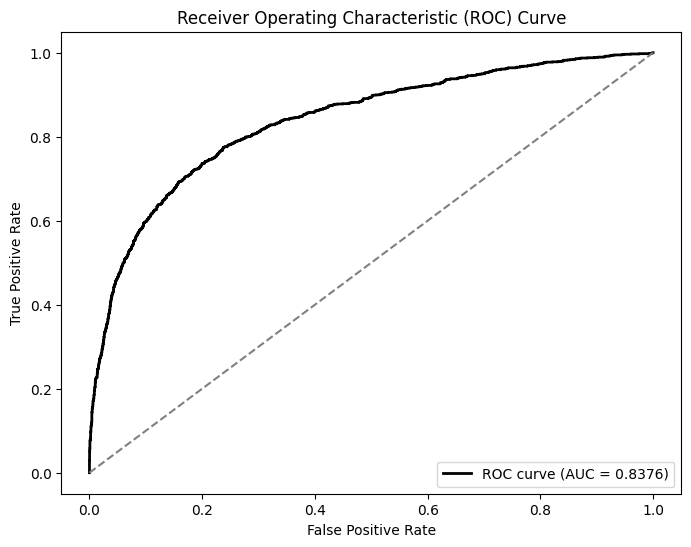

In [30]:
# Lakukan prediksi probabilitas pada data uji
y_scores = model.predict_proba(X_test)[:,1]

# Hitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Menampilkan grafik kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()